# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES

Over here we determine whether a bank customer will retire or not based on his age and 401K Savings using SVM. At first, we will directly apply support vector classifier to our data and check the accuracy.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
bank_df = pd.read_csv('Bank_Customer_retirement.csv')

In [3]:
bank_df.head(10)

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
5,5,50.499789,742398.9068,1
6,6,39.573302,578650.3156,0
7,7,55.159309,533821.2011,1
8,8,30.791271,459592.4084,0
9,9,40.456073,396800.2509,0


In [4]:
bank_df.shape

(500, 4)

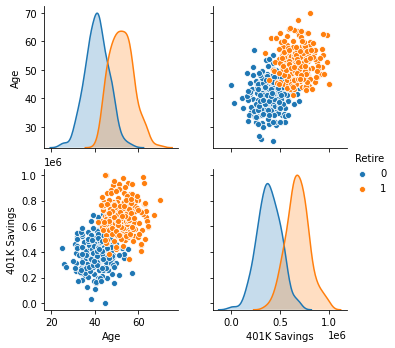

In [5]:
sns.pairplot(bank_df, hue = 'Retire', vars = ['Age', '401K Savings'] )

<AxesSubplot:xlabel='Retire', ylabel='count'>

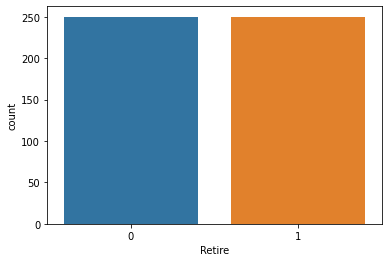

In [6]:
sns.countplot(bank_df['Retire'], label = "Retirement") 

In [7]:
bank_df = bank_df.drop(['Customer ID'],axis=1)

In [8]:
X = bank_df.drop(['Retire'],axis=1)

In [9]:
X = X.values

In [10]:
X

array([[3.91804173e+01, 3.22349874e+05],
       [5.61016860e+01, 7.68671574e+05],
       [5.70230427e+01, 8.21505472e+05],
       [4.37113581e+01, 4.94187485e+05],
       [5.47288232e+01, 6.91435772e+05],
       [5.04997891e+01, 7.42398907e+05],
       [3.95733022e+01, 5.78650316e+05],
       [5.51593087e+01, 5.33821201e+05],
       [3.07912714e+01, 4.59592408e+05],
       [4.04560728e+01, 3.96800251e+05],
       [3.38911974e+01, 2.72808272e+05],
       [4.27544162e+01, 3.77042246e+05],
       [4.42249802e+01, 4.82773224e+05],
       [4.74990645e+01, 6.28103678e+05],
       [6.28624108e+01, 7.71170284e+05],
       [5.63314358e+01, 5.31736742e+05],
       [4.31669950e+01, 4.75505760e+05],
       [6.37855439e+01, 6.69249971e+05],
       [4.57904008e+01, 4.88283996e+05],
       [4.90707308e+01, 6.66179034e+05],
       [4.49290770e+01, 6.67652074e+05],
       [4.83379384e+01, 5.76300132e+05],
       [5.12910441e+01, 5.84324079e+05],
       [4.70737861e+01, 6.76035723e+05],
       [4.775975

In [11]:
y = bank_df['Retire'].values
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1234)

In [13]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

/Users/onkarthorat/opt/anaconda3/envs/final/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

<AxesSubplot:>

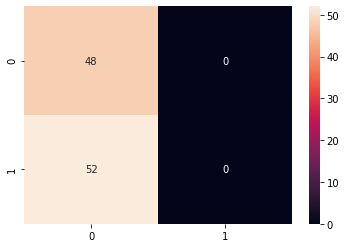

In [15]:
sns.heatmap(cm, annot=True)

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        48
           1       0.00      0.00      0.00        52

    accuracy                           0.48       100
   macro avg       0.24      0.50      0.32       100
weighted avg       0.23      0.48      0.31       100



/Users/onkarthorat/opt/anaconda3/envs/final/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Since, we are not getting a good accuracy, let us do some data preprocessing and tune C and gamma values of SVM.

In [17]:
min_train = X_train.min()
min_train

10.0

In [18]:
range_train = (X_train - min_train).max()
range_train

999990.0

In [19]:
X_train_scaled = (X_train - min_train)/range_train

In [20]:
X_train_scaled

array([[3.55598576e-05, 6.62134660e-01],
       [4.97109635e-05, 5.14189632e-01],
       [2.91807091e-05, 3.22343097e-01],
       [2.93680054e-05, 2.80809609e-01],
       [2.60468670e-05, 2.75527541e-01],
       [4.23616574e-05, 4.30740742e-01],
       [3.41620721e-05, 4.37212142e-01],
       [1.59108313e-05, 3.09953557e-01],
       [3.23275884e-05, 1.94560581e-01],
       [2.39793544e-05, 2.41476803e-01],
       [2.63548304e-05, 4.68351701e-01],
       [4.06449623e-05, 6.24048933e-01],
       [4.43157154e-05, 6.74955435e-01],
       [4.60396947e-05, 6.66306134e-01],
       [4.85850902e-05, 5.75568996e-01],
       [3.66784948e-05, 7.04240120e-01],
       [3.83383218e-05, 5.76295895e-01],
       [3.85013717e-05, 9.21089894e-01],
       [2.16458662e-05, 2.52230260e-01],
       [3.45521270e-05, 4.77701727e-01],
       [2.53585476e-05, 2.09509874e-01],
       [3.83587748e-05, 7.87855741e-01],
       [3.39905218e-05, 7.26519160e-01],
       [3.36528349e-05, 5.69380174e-01],
       [3.378423

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

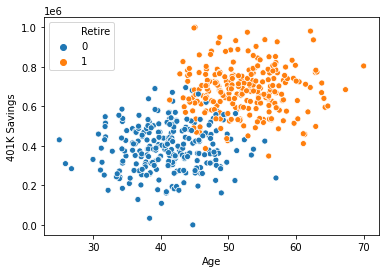

In [21]:
sns.scatterplot(x = bank_df['Age'], y = bank_df['401K Savings'], hue = bank_df['Retire'])

In [22]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [23]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [26]:
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.881, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.932, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.842, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.507, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.504, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.504, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

/Users/onkarthorat/opt/anaconda3/envs/final/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [27]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [28]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
grid_predictions = grid.predict(X_test_scaled)

In [30]:
cm = confusion_matrix(y_test, grid_predictions)

<AxesSubplot:>

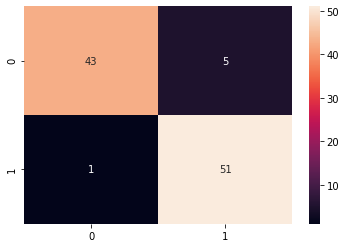

In [31]:
sns.heatmap(cm, annot=True)

In [32]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93        48
           1       0.91      0.98      0.94        52

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [33]:
svc_model.support_vectors_

array([[4.55595020e+01, 6.62138039e+05],
       [3.91804173e+01, 3.22349874e+05],
       [3.93677117e+01, 2.80816801e+05],
       [3.60466065e+01, 2.75534786e+05],
       [5.23612338e+01, 4.30746435e+05],
       [4.41617305e+01, 4.37217770e+05],
       [2.59106722e+01, 3.09960458e+05],
       [4.23272651e+01, 1.94568635e+05],
       [3.39791146e+01, 2.41484388e+05],
       [3.63545669e+01, 4.68357017e+05],
       [4.83379384e+01, 5.76300132e+05],
       [3.16456498e+01, 2.52237738e+05],
       [4.45517815e+01, 4.77706950e+05],
       [3.53582940e+01, 2.09517779e+05],
       [4.37838940e+01, 3.55078494e+05],
       [3.79974891e+01, 3.54267923e+05],
       [4.13324912e+01, 5.08589004e+05],
       [3.81083354e+01, 5.02523755e+05],
       [4.67088562e+01, 6.20421220e+05],
       [4.77597585e+01, 5.38416345e+05],
       [4.89561332e+01, 1.61821907e+05],
       [4.17524617e+01, 3.16578211e+05],
       [3.72627454e+01, 4.47747673e+05],
       [4.81528965e+01, 3.28476669e+05],
       [4.197636